In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math,random
from tqdm import tqdm
import digits_data # from file

def step_function(x):
    return 1 if x >= 0 else 0


def perceptron_output(weights, bias, x):
    '''Returns 1 if the perceptrion 'fires', 0 if not '''
    return step_function(np.dot(weights, x) + bias)

def sigmoid(t):
    return 1 / (1 + math.exp(-t))

def neuron_output(weights, inputs):
    return sigmoid(np.dot(weights, inputs))

def feed_forward(neural_network, input_vector):
    """takes in a neural network (represented as a list of lists of lists of weights)
    and returns the output from forward-propagating the input"""

    outputs = []

    for layer in neural_network:

        input_with_bias = input_vector + [1]             # add a bias input
        output = [neuron_output(neuron, input_with_bias) # compute the output
                  for neuron in layer]                   # for this layer
        outputs.append(output)                           # and remember it

        # the input to the next layer is the output of this one
        input_vector = output

    return outputs
    
def backpropagate(network, input_vector, targets):
    hidden_outputs, outputs = feed_forward(network, input_vector)
    # the output * (1 - output) is from the derivative of sigmoid
    output_deltas = [output * (1 - output) * (output - target) for output, target in zip(outputs, targets)]
        # adjust weights for output layer, one neuron at a time
    for i, output_neuron in enumerate(network[-1]):
    # focus on the ith output layer neuron
        for j, hidden_output in enumerate(hidden_outputs + [1]):
            # adjust the jth weight based on both
            # this neuron's delta and its jth input
            output_neuron[j] -= output_deltas[i] * hidden_output
    # back-propagate errors to hidden layer
    hidden_deltas = [hidden_output * (1 - hidden_output) * np.dot(output_deltas, [n[i] for n in output_layer])for i, hidden_output in enumerate(hidden_outputs)]
    # adjust weights for hidden layer, one neuron at a time
    for i, hidden_neuron in enumerate(network[0]):
        for j, input in enumerate(input_vector + [1]):
            hidden_neuron[j] -= hidden_deltas[i] * input

## Neural network training

In [2]:
inputs = digits_data.DIGITS
targets = [[1 if i == j else 0 for i in range(10)]
for j in range(10)]

# NEURAL NETWORK
###########
random.seed(0) # to get repeatable results
input_size = 25 # each input is a vector of length 25
num_hidden = 5 # we'll have 5 neurons in the hidden layer
output_size = 10 # we need 10 outputs for each input

# each hidden neuron has one weight per input, plus a bias weight
hidden_layer = [[random.random() for __ in range(input_size + 1)] for __ in range(num_hidden)]

# each output neuron has one weight per hidden neuron, plus a bias weight
output_layer = [[random.random() for __ in range(num_hidden + 1)] for __ in range(output_size)]

# the network starts out with random weights
network = [hidden_layer, output_layer]


# 10,000 iterations seems enough to converge
for __ in  tqdm(range(10000)):
    for input_vector, target_vector in zip(inputs, targets):
        backpropagate(network, input_vector, target_vector)

100%|██████████| 15000/15000 [00:54<00:00, 272.73it/s]


## digits, as being compared against..

In [56]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "digits.PNG")

## usage

In [3]:
def predict(input):
    return feed_forward(network, input)[-1]
res = predict(inputs[7])
np.round(res,2) # round pretty

array([0.02, 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.98, 0.  , 0.  ])

# Prediction, stylized 3

In [6]:
res = predict([0,1,1,1,0, # .@@@.
0,0,0,1,1,                # ...@@
0,0,1,1,0,                # ..@@.
0,0,0,1,1,                # ...@@
0,1,1,1,0])               # .@@@.
np.round(res,2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.59, 0.  , 0.  , 0.92, 1.  ])

# Prediction, stylized 8

In [7]:
res = predict([0,1,1,1,0, # .@@@.
1,0,0,1,1,                # @..@@
0,1,1,1,0,                # .@@@.
1,0,0,1,1,                # @..@@
0,1,1,1,0])               # .@@@.
np.round(res,2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.59, 0.  , 0.  , 0.92, 1.  ])

# Plot Weights

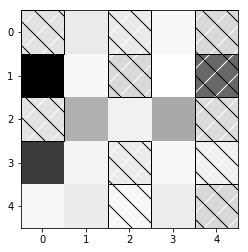

In [8]:
import matplotlib
weights = network[0][0] # first neuron in hidden layer
abs_weights = list(map(abs, weights)) # darkness only depends on absolute value
grid = [abs_weights[row:(row+5)] for row in range(0,25,5)] # turn the weights into a 5x5 grid [weights[0:5], ..., weights[20:25]]

ax = plt.gca() # to use hatching, we'll need the axis

ax.imshow(grid,cmap=matplotlib.cm.binary,interpolation='none')  # here same as plt.imshow use white-black color scale plot blocks as blocks

def patch(x, y, hatch, color):
    """return a matplotlib 'patch' object with the specified
    location, crosshatch pattern, and color"""
    return matplotlib.patches.Rectangle((x - 0.5, y - 0.5), 1, 1, hatch=hatch, fill=False, color=color)

# cross-hatch the negative weights
for i in range(5): # row
    for j in range(5): # column
        if weights[5*i + j] < 0: # row i, column j = weights[5*i + j]
            # add black and white hatches, so visible whether dark or light
            ax.add_patch(patch(j, i, '/', "white"))
            ax.add_patch(patch(j, i, '\\', "black"))
plt.show()